# Week 11

### Table of Contents

1. [What are APIs?](#bullet1)
2. [REST APIs](#bullet2)
3. [Example: BLS API](#bullet3)
4. [Example: ProPublica API](#bullet4)
5. [Using APIs to get data: Python Packages](#bullet5)
6. [No Python Package? Manipulate URL directly](#bullet6)

## 1. What are APIs? <a class="anchor" id="bullet1"></a>

This notebook goes over how to read in data using an __Application Programming Interface__ (API). Similar to how User Interface (UI) allows a human to interact with a computer, APIs allow one piece of software to communicate with another. This communication can take place through the internet - from say your computer to a server hosted by someonelse. This communication can also happen between different types of devices. This week we will learn how to use Python to pull data in from APIs hosted by various governmental and private sector organizations.

It is important to remember that API syntax varies from different companies and platforms. Ultimately, APIs are a method of communication between software programs that allow pregrams to interact and use each other's functions by acting as a middle man.

#### Why is this useful?

- Could manually download and organize data...
- Could scrape data from a website, but this can take time and can be messy. Site structures can change in the future, and sometimes you will be blocked from scraping a site, which breaks your code...
- Changes to website struture won't impact the API data retrieval structure. Which means you don't need to change your code  
- Importing data through an API is relatively easy, prestructured access to data that is consistent  
- API access is growing fast, so it's important that you know how to get data in using them

#### The basics
Datasets can be complicated as they can be shaped many different ways and have many or few variables. As a result, APIs can also be more or less complex. You need to understand the following when you want to use an API:

<div class="alert alert-block alert-success">
<b>Requirments for using APIs:</b> 
    
1. __URL__ for the organization and data you are pulling. 
2. __Which dataset__ you are trying to pull from: Often there are numerous data sets you can extract, so you need to read documentation.
3. __Data content__. Need to specify the variables you want the API to retrieve: This requires you to know the available data.  
4. (*Not always necessary*) Provide a **form of identification and/or authorization** such as...
    
    i. __API key__ (aka token). A key is used to identify the user along with track and control how the API is being used (guard against malicious use). A key is often obtained by supplying basic information (i.e. name, email, phone number) to the organization and in return they give you a multi-digit key.
    ii. __OAuth__. OAuth is an authorization framework that provides credentials as proof for access to certain information. 

</div>

## 2. REST APIs <a class="anchor" id="bullet2"></a>

One of the most popular architectures used to build APIs is the __REpresentational State Transfer (REST)__ pattern. The REST architectural design enables the client and server to be implemented independently of one another without being aware of each other - this means code on either side can be changed without worrying about how the change will affect the other. 

They are a set of guidelines designed to simplify communications between software, thereby making the process of accessing data more straightforward and logical. Don’t worry if you don’t know these guidelines; you don’t need to know them to get started – what you do need to know is how data is exposed from REST services. 

Data from REST web services are exposed to the internet through a public URL, which can be accessed by sending an HTTP request.  

The HTTP verbs comprise a major portion of our “uniform interface” constraint and provide us the action counterpart to the noun-based resource. The primary or most-commonly-used __HTTP verbs+ (or methods, as they are properly called) are:
- POST
- GET
- PUT
- PATCH
- DELETE

These correspond to __create, read, update, and delete (CRUD)__ operations, respectively. There are a number of other verbs, too, but are utilized less frequently. Of those less-frequent methods, OPTIONS and HEAD are used more often than others.

Above, we've used the get verb when we used the requests package. Here, we will use GET and POST to with the http library.

Source: [RESTapitutorial](https://www.restapitutorial.com/lessons/httpmethods.html)

#### GET requests

The HTTP GET method is used to **read** (or retrieve) a representation of a resource. __It’s highly likely you will be performing GET requests more than any other method in data analysis and data science.__ When you perform a request to a web server, a response is returned by the API. Attached to the response is an HTTP status code. The purpose of the status code is to provide additional information about the response, so the client knows the type of request being received. 

In the “happy” (or non-error) path, GET returns a representation in XML or JSON and an HTTP response code of __200 (OK)__. In an error case, it most often returns a 404 (NOT FOUND) or 400 (BAD REQUEST).

According to the design of the HTTP specification, GET (along with HEAD) requests are used only to read data and not change it. Therefore, when used this way, they are considered safe. That is, they can be called without risk of data modification or corruption—calling it once has the same effect as calling it 10 times, or none at all. Additionally, GET (and HEAD) is idempotent, which means that making multiple identical requests ends up having the same result as a single request.

In [1]:
## The HTTP Response code tells us that we have successfully performed a GET request!
## Note, there is no structured data at this website, but 
## we can look at the header data anywyas
import http
data = http.client.HTTPSConnection("www.askpython.com")
data.request("GET", "/")
response = data.getresponse()
header = response.getheaders()
print(response.reason)
print(response.status)
print(header)
data.close()

OK
200
[('Date', 'Sat, 01 Apr 2023 19:20:25 GMT'), ('Content-Type', 'text/html; charset=UTF-8'), ('Transfer-Encoding', 'chunked'), ('Connection', 'keep-alive'), ('x-dns-prefetch-control', 'on'), ('link', '<https://www.askpython.com/wp-json/>; rel="https://api.w.org/"'), ('x-litespeed-cache', 'hit'), ('vary', 'Accept-Encoding'), ('CF-Cache-Status', 'DYNAMIC'), ('Report-To', '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v3?s=nkQVYM8WOf%2FpU4JSe3uR3YdCkpKGceRSYVEugLLiu0stJHtKMJvyJrw%2FksbdNWDcRVnelpWuktFiItIuLVCUDOjX4kvUpiiU%2FZ9a4qGhsflhiXrZCbmFKd4%2B%2Fx7Sqqzwu0dnrA%3D%3D"}],"group":"cf-nel","max_age":604800}'), ('NEL', '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}'), ('Server', 'cloudflare'), ('CF-RAY', '7b13307649cf0cbc-EWR'), ('alt-svc', 'h3=":443"; ma=86400, h3-29=":443"; ma=86400')]


#### Endpoints

The data you interact with on a web server is delineated with a URL. Much like how a web page URL is connected to a single page, an endpoint URL is connected to particular resources within an API. Therefore, __an endpoint may be described as a digital location where an API receives inquiries__ about a particular resource on its server – think of it as the other end of a  communication channel. 

To add more context, REST APIs expose a set of public URLs that may be requested by client applications to access the resources of the web service. The public URLs exposed by the REST API are known as “endpoints.”

#### Making a GET request

In [2]:
import requests

# The API endpoint
url = "https://jsonplaceholder.typicode.com/posts/1"

# A GET request to the API
response = requests.get(url)

# Print the response
response_json = response.json()
print(response_json)

{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


In the code above, we carried out the following: 

1. Defined the API endpoint to retrieve data from
2. Used the requests.get(url) method to retrieve the data from the defined endpoint. 
3. We used the response.json() method to store the response data in a dictionary object; note that this only works because the result is written in JSON format – an error would have been raised otherwise.   
4. The last step is to print the JSON response data. 

In [3]:
# We can also check the status code returned from the API like this: 
print(response.status_code)

200


You can also pass arguments to a python GET request. To do this, we must slightly alter the code above. Here’s how the new code looks…

In [4]:
# The API endpoint
url = "https://jsonplaceholder.typicode.com/posts/"

# Adding a payload
payload = {"id": [1, 2, 3], "userId":1}

# A get request to the API - Pass payload to the param argument of the requests.get() method
response = requests.get(url, params=payload) 

# Print the response
response_json = response.json()

# Print keys of each dictionary
print(response_json[1].keys())
print('\n')

for i in response_json:
    print(i, "\n")

dict_keys(['userId', 'id', 'title', 'body'])


{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'} 

{'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'} 

{'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'} 



#### POST requests

The POST verb is most-often utilized to **create** new resources. In particular, it's used to create subordinate resources. That is, subordinate to some other (e.g. parent) resource. In other words, when creating a new resource, POST to the parent and the service takes care of associating the new resource with the parent, assigning an ID (new resource URI), etc.

On successful creation, return __HTTP status 201__, returning a Location header with a link to the newly-created resource with the 201 HTTP status.

POST is __neither safe nor idempotent__. It is therefore recommended for non-idempotent resource requests. An HTTP method is idempotent if the intended effect on the server of making a single request is the same as the effect of making several identical requests. Making two identical POST requests will most-likely result in two resources containing the same information. 

#### Making a POST request

GET requests allow you to retrieve data; POST requests allow you to create new data. Let’s take a look at how we can create new data on the JSONPlaceholder server.

In [5]:
# Define new data to create
new_data = {
    "userID": 1,
    "id": 1,
    "title": "Making a POST request",
    "body": "This is the data we JUST created."
}

In [6]:
# The API endpoint to communicate with
url_post = "https://jsonplaceholder.typicode.com/posts"

# A POST request to tthe API
post_response = requests.post(url_post, json=new_data)

# Print the response
post_response_json = post_response.json()
print(post_response_json)

{'userID': 1, 'id': 101, 'title': 'Making a POST request', 'body': 'This is the data we JUST created.'}


In the code above, we performed the following: 

1. Created a new resource we wanted to add to the JSONPlaceholder API 
2. Defined the endpoint to POST the new data
3. Sent a POST request using the requests.post() method. Note that the json parameter was set in the post() method; we do this to tell the API we are explicitly sending a JSON object to the specified URL. 
4. Used the response.json() method to store the response data in a dictionary object
5. The last step is to print the JSON response data. 

##### Question: After creating a new resource, what status code can we expect to be returned by the API?

In [ ]:
print(post_response.status_code)

#### Authenticating requests 

Up to this point, the interactions we’ve had with the REST API have been pretty straightforward. The JSONPlaceholder API does not require any authentication for you to start interacting with it. But, there are several instances where a REST API may require authentication before access is granted to specific endpoints – especially when you’re dealing with sensitive data. 

For example, if you want to create integrations, retrieve data, and automate your workflows on GitHub, you can do so with GitHub REST API. However, there are many operations on the GitHub REST API that require authentication, such as retrieving public and private information about authenticated users. 

Here’s a simple workaround using the Python requests module

In [7]:
# You would need to enter your username and token below
from requests.auth import HTTPBasicAuth

private_url = "https://api.github.com/user"
github_username = "username"
token = "token"

private_url_response = requests.get(
    url=private_url,
    auth=HTTPBasicAuth(github_username, token)
)

private_url_response.status_code

"""
200
"""
POWERED BY DATACAMP WORKSPACE

SyntaxError: invalid syntax (2018410782.py, line 18)

In the code above we:

1. Imported the HTTPBasicAuth object from requests.auth; this object attaches HTTP  basic authentication to the given request object – it’s essentially the same as typing your username and password into a website. 
2. Defined the private URL endpoint to access 
3. Instantiated a variable with a GitHub username – we anonymized the username for privacy.
4. Instantiated a variable GitHub with a personal access token for authentication.  
5. Retrieved data from our endpoint and stored it in the private_url_response variable. 
6. Displayed the status code.  

#### Handling errors

There are instances where requests made to an API do not go as expected. Several factors on either the client or server-side could be at play. Regardless of the cause, the outcome is always the same: the request fails. 

When using REST APIs, it’s always a good idea to make your code resilient. However, before you can write robust code, you must understand how to manage the reported errors when things do not go to plan.  

Let’s go back to the JSONPlaceholder API for this demonstration. We will start by writing some code and then explain what is going on.  

In [8]:
# A deliberate typo is made in the endpoint "postz" instead of "posts"
url = "https://jsonplaceholder.typicode.com/postz"

# Attempt to GET data from provided endpoint
try:
    response = requests.get(url)
    response.raise_for_status()
# If the request fails (404) then print the error.
except requests.exceptions.HTTPError as error:
  print(error)

404 Client Error: Not Found for url: https://jsonplaceholder.typicode.com/postz


In the code above, we: 

1. Defined the JSONPlace holder endpoint to retrieve data from, but we made a deliberate typo when constructing the URL – this will raise a 404 error. 
2. Used Python’s built-in exception handling, try and except catch any errors that occur when attempting to visit the JSONPlaceholder endpoint. Note, the raise_for_status() method is what is used to return an HTTPError object when an error occurs during the process.
3. Printed the error that was raised. 

Although we demonstrated how to handle 404 error status codes in this instance, the same format can be used to handle any HTTP status code. 

Vist the datacamp page cited above to see how to handle other types of errors, including:
- Dealing with too many redirects
- Connection errors
- Timeout

## 3. Example: BLS Public Data API <a class="anchor" id="bullet3"></a>

Where APIs exist, you will usually be able to find code online through a simple google search to help you access a particular API. For example, you can read about the BLS's Public Data API here: https://www.bls.gov/developers/home.htm

From that link, we can learn several things about APIs:
- APIs exist because there are incentives on both sides (the organization and the user). The BLS explictly states that "It is the Bureau's hope that talented developers and programmers will use the BLS Public Data API to create original, inventive applications with published BLS data." Obviously, they benefit from having their data more widely used/cited, so they have incentives to make accessing their data as easy as possible
- They mention two different APIs, one which requires registration (Version 2) and one which does not (Version 1). Varying levels of access are common with APIs. In some cases (like using the Twitter API), you have to submit an application before you can get access
- The BLS API exports data in a JSON Data format, which today is the most common exporting format used to be JSON (XML is also used, but today JSON is more popular)
- "The BLS Public API utilizes two HTTP request-response mechanisms to retrieve data: `GET` and `POST`. `GET` requests data from a specified source. `POST` submits data to a specified resource to be processed. The BLS Public Data API uses GET to request a single piece of information and POST for all other requests."
- They've provided sample code in amost a dozen different programming langugaes that you can leverage to access their API!
- They provide a list of FAQs, which is commonly provided by organizations to help end users 

The code that we will leverage to connect to the BLS's Public Data API is from an online resource: https://www.bd-econ.com/blsapi.html. As said at that web address:
> "The BLS Public Data API allows machine access to an enormous and incredibly useful set of U.S. economic data. With python, it is easy to integrate BLS data into projects, research, and graphics without the need to manually find, download, and combine files.  
  
> This notebook offers two examples of using python to request economic data from the BLS API. The first example requests the labor force participation rate from the BLS v1 API. The second example requests unemployment rates by race/origin, and shows a method for requesting multiple series over a longer period of time using the v2 API".

### Single series from API v1

##### Note: This section is taken verbatim from the link above.

##### Step 1: API Location
The version 1 API, which does not require registration, is located at the URL base_url below.

In [9]:
# BLS API v1 url
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

##### Step 2: BLS series id

The BLS [data site](https://www.bls.gov/data/) offers different search tools to find the series ID for the data of interest. In this case, I'm going to type out a python dictionary with two keys and two values. The first key is the word id and its value is the BLS series ID. The second key is name and its value is a short descriptive name that corresponds to the series.

In [10]:
# BLS series id for the civilian labor force participation rate
series = {'id': 'LNS11300000',
          'name': 'Labor Force Participation Rate'}

In [11]:
# Combine the base url and series id into a single string which is the API url with data. 
# Print a link to the data.
data_url = '{}{}'.format(base_url, series['id'])
print(data_url)

https://api.bls.gov/publicAPI/v1/timeseries/data/LNS11300000


#### Step 3: Request data from data url and transform it into a pd.DataFrame

Use the requests package to get data from the data_url. By specifying that the data are in json format, we convert the output to nested python dictionaries and lists. The status of the request is printed and the top-level dictionary is stored as variable r.

In [12]:
import requests

r = requests.get(data_url).json()
print('Status: ' + r['status'])

Status: REQUEST_SUCCEEDED


In [13]:
# Check data
r # it's a JSON file

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 221,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS11300000',
    'data': [{'year': '2023',
      'period': 'M02',
      'periodName': 'February',
      'latest': 'true',
      'value': '62.5',
      'footnotes': [{}]},
     {'year': '2023',
      'period': 'M01',
      'periodName': 'January',
      'value': '62.4',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M12',
      'periodName': 'December',
      'value': '62.3',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M11',
      'periodName': 'November',
      'value': '62.2',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M10',
      'periodName': 'October',
      'value': '62.2',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M09',
      'periodName': 'September',
      'value': '62.3',
      'footnotes': [{}]},
     {'year': '2022',
      'period': 'M08',
      'periodName': 'August',
      'value': '

In [14]:
print(r.keys()) # The results key has the data we want

dict_keys(['status', 'responseTime', 'message', 'Results'])


In [15]:
r = r['Results']['series'][0]['data']
print(r[0])

{'year': '2023', 'period': 'M02', 'periodName': 'February', 'latest': 'true', 'value': '62.5', 'footnotes': [{}]}


In [16]:
# Reformat to a pandas object
import pandas as pd

dates = ['{} {}'.format(i['period'], i['year']) for i in r]
index = pd.to_datetime(dates)
data = {series['id']: [float(i['value']) for i in r],
        'footnotes': [i['footnotes'][0] for i in r]}

df = pd.DataFrame(index=index, data=data).iloc[::-1]

df.head()

,LNS11300000,footnotes
2021-01-01 00:00:01,61.3,{}
2021-01-01 00:00:02,61.4,{}
2021-01-01 00:00:03,61.5,{}
2021-01-01 00:00:04,61.6,{}
2021-01-01 00:00:05,61.5,{}


Calculate the average value for the period and plot both the monthly values and average value to look for trends.

<AxesSubplot:title={'center':'Labor Force Participation Rate'}>

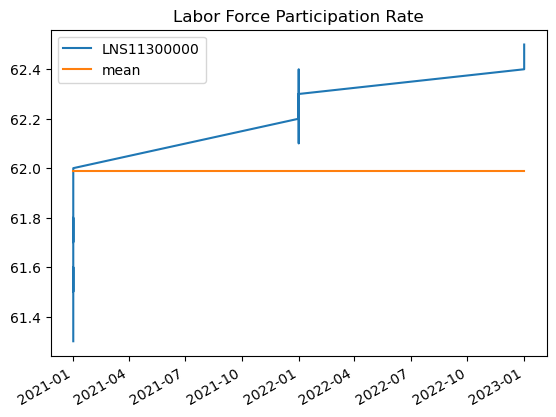

In [17]:
%matplotlib inline

df['mean'] = df[series['id']].mean()
df[[series['id'], 'mean']].plot(title=series['name'])

## 4. Example: ProPublica API <a class="anchor" id="bullet4"></a>

##### Note: This section is taken verbatim from this [link](https://propublica-congress.readthedocs.io/en/latest/).

In [18]:
!pip install python-congress

The main entrypoint for the API is the Congress class, which is instantiated with your API key. (Request an API key at [ProPublica’s data store](https://www.propublica.org/datastore/api/propublica-congress-api).)

In [19]:
from congress import Congress
congress = Congress('Bqe6kl3aYOa8RnsLKLiVm4tv1sr328265zlYqo3n') ## replace with your API key

<div class="alert alert-block alert-danger">
<b>Caution:</b> 
    
You should never embed your keys in a document as we've done here. We've done this to make this example faster to use in class. The best place to save keys is in some sort of "valut", which is like a password manager for keys/OAuth information. For example, [GitHub Secrets](https://docs.github.com/en/actions/security-guides/encrypted-secrets) is a common software.

    
</div>

In [20]:
type(congress)  # Special object type from the congress library

congress.Congress

In [21]:
# get member by bioguide ID
pelosi = congress.members.get('P000197')
pelosi['twitter_account']

'SpeakerPelosi'

In [22]:
# get recent House bills
# recent bills come in two types: 'introduced' and 'updated'
introd = congress.bills.recent(
    chamber='house',
    congress=115,
    type='introduced')

In [23]:
len(introd['bills'])

20

In [24]:
introd['chamber']

'House'

In [25]:
# or use a convenience function
introd = congress.bills.introduced('house')
introd['chamber']

'House'

In [26]:
len(introd['bills'])

20

## 5. Using APIs to get data: Python Packages <a class="anchor" id="bullet5"></a>

You should always look for an python package that let's you access API data first. For example, above we accessed data through ProPublica's Python library Congress.

Why?  
- Typically you will find it easier to access the data you are looking for.
- Functions can give you access to data in an intuitive way.  
- This is better than searching through API documentation on your own.

__Helpful hint:__ Look on GitHub for examples of accessing APIs 
- [BLS API](https://github.com/OliverSherouse/bls)
- [twarc API for for scraping Twitter](https://github.com/DocNow/twarc)
- [pynytimes api for scrapping nytimes](https://github.com/michadenheijer/pynytimes)

However, API keys and Oauthorization are required nowadays across majority of platforms 
due to an increased awarness of cybersecurity and data privacy.

## 6. No Python Package? Manipulate URL directly <a class="anchor" id="bullet6"></a>

pynytimes takes the API URL, reshapes it using our arguments, and returns data. We can do this on our own! We read in the url using the requests library, and the json

__Step one__: examine the API url structure and parameters.  Let's focus on the article API from the first part of the rtimes example. Examine the documentation for the nytimes apis to figure out the URL structure:
https://developer.nytimes.com/docs/articlesearch-product/1/routes/articlesearch.json/get
the url is listed under the header "Requests" when you scroll down the page

Generic Example of URL: 
http://api.nytimes.com/svc/search/v2/articlesearch.json?q=new+york+times&page=2&sort=oldest&api-key=####

__Note__: "?q=new+york+times&page=2&sort=oldest&api-key=####" --> This is the Query String, which is appended on to the end of the nytimes web api

This URL uses the article search api for articles that mention "new york times".  Note
that it still requires an api-key, so it won't work if you paste it into a browser. You need to replace "###" with a key code and then it will work
  
The API request will return JSON data.  So we need to use a function to convert JSON data to pandas with the URL to get results into R.

In [44]:
# Let's conduct an  article search for Biden from
# begin_date = "20220801" to end_date = '20221231'

#First we will create different parts of the final URL, then we will combine them together
article_key = "Dh5ALRSh2qe7I7FhAAj8VHxwcVO9FFy8" # replace text with your key here
term = "Trump" # Need to use + to string together separate words for multiple terms
begin_date = "20220328" 
end_date = "20220328"

In [45]:
finalurl = "http://api.nytimes.com/svc/search/v2/articlesearch.json?q=" + term + "&begin_date=" + begin_date + "&end_date=" + end_date + "&api-key=" + article_key

In [46]:
finalurl

'http://api.nytimes.com/svc/search/v2/articlesearch.json?q=Trump&begin_date=20220328&end_date=20220328&api-key=Dh5ALRSh2qe7I7FhAAj8VHxwcVO9FFy8'

In [47]:
r = requests.get(finalurl)
r = r.json()
print(r.keys())

dict_keys(['status', 'copyright', 'response'])


In [48]:
import pandas as pd
data = pd.DataFrame(r['response']['docs'])
print(data.shape)   # look at dim of data
print(data.columns) # look at columns
data

(6, 20)
Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name',
       'subsection_name', 'byline', 'type_of_material', '_id', 'word_count',
       'uri'],
      dtype='object')


,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,subsection_name,byline,type_of_material,_id,word_count,uri
0,"“The illegality of the plan was obvious,” the ...",https://www.nytimes.com/2022/03/28/us/politics...,"“The illegality of the plan was obvious,” the ...",Follow live updates on the House committee hea...,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Federal Judge Finds Trump Most Likel...,"[{'name': 'persons', 'value': 'Trump, Donald J...",2022-03-28T16:24:51+0000,article,Washington,U.S.,Politics,"{'original': 'By Luke Broadwater, Alan Feuer a...",News,nyt://article/47ca02b0-b3a9-5542-b4b0-2dac8769...,1602,nyt://article/47ca02b0-b3a9-5542-b4b0-2dac8769...
1,The House committee investigating the Capitol ...,https://www.nytimes.com/2022/03/27/us/politics...,The House committee investigating the Capitol ...,WASHINGTON — The House committee investigating...,A,17,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Jan. 6 Panel Makes Case for Contempt...,"[{'name': 'subject', 'value': 'Storming of the...",2022-03-28T01:37:40+0000,article,Washington,U.S.,Politics,{'original': 'By Luke Broadwater and Alan Feue...,News,nyt://article/85ff3c5b-819d-583a-9f6c-5dd75c18...,1141,nyt://article/85ff3c5b-819d-583a-9f6c-5dd75c18...
2,The committee is preparing to reach out to the...,https://www.nytimes.com/2022/03/28/us/politics...,The committee is preparing to reach out to the...,WASHINGTON — The House committee investigating...,A,18,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Jan. 6 Panel Is Likely to Seek Inter...,"[{'name': 'persons', 'value': 'Thomas, Virgini...",2022-03-28T17:52:41+0000,article,Washington,U.S.,Politics,"{'original': 'By Luke Broadwater', 'person': [...",News,nyt://article/504254d8-b908-57e0-b0d3-11531b83...,675,nyt://article/504254d8-b908-57e0-b0d3-11531b83...
3,Washington is getting extra serious and extra ...,https://www.nytimes.com/2022/03/28/opinion/bid...,Washington is getting extra serious and extra ...,"Bret Stephens: Hi, Gail. I think many American...",A,22,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","{'main': 'Ted Cruz Knows Which Side He’s On', ...","[{'name': 'subject', 'value': 'United States E...",2022-03-28T09:00:16+0000,article,OpEd,Opinion,NaN,{'original': 'By Gail Collins and Bret Stephen...,Op-Ed,nyt://article/90101d41-4876-58de-a3eb-483a9a33...,1638,nyt://article/90101d41-4876-58de-a3eb-483a9a33...
4,Attorney General Maura Healey of Massachusetts...,https://www.nytimes.com/2022/03/28/opinion/swa...,Attorney General Maura Healey of Massachusetts...,Attorney General Maura Healey of Massachusetts...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Why Facebook’s ‘Hubris and Arrogance...,"[{'name': 'subject', 'value': 'audio-neutral-i...",2022-03-28T09:00:09+0000,article,OpEd,Opinion,NaN,"{'original': 'By ‘Sway'', 'person': [{'firstna...",Op-Ed,nyt://article/5479531a-bb4c-5c07-bc93-9cb615e0...,268,nyt://article/5479531a-bb4c-5c07-bc93-9cb615e0...
5,Are we losing the traditional values that real...,https://www.nytimes.com/2022/03/28/opinion/put...,Are we losing the traditional values that real...,"Vladimir Putin’s invasion of Ukraine was, firs...",A,23,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",{'main': 'Putin and the Myths of Western Decad...,"[{'name': 'subject', 'value': 'Storming of the...",2022-03-28T23:00:10+0000,article,OpEd,Opinion,NaN,"{'original': 'By Paul Krugman', 'person': [{'f...",Op-Ed,nyt://article/44b2f5aa-f004-5660-9878-10bd6806...,881,nyt://article/44b2f5aa-f004-5660-9878-10bd6806...
